In [102]:
install.packages("ggcorrplot")
library(tidyverse)
library(ggcorrplot)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [103]:
set.seed(2021)
housing<- read_delim("housing.csv", col_names = c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat", "medv"),
                  delim = ' '
                  )
head(housing, 5)

Parsed with column specification:
cols(
  crim = col_character(),
  zn = col_character(),
  indus = col_character(),
  chas = col_character(),
  nox = col_character(),
  rm = col_character(),
  age = col_character(),
  dis = col_character(),
  rad = col_character(),
  tax = col_character(),
  ptratio = col_character(),
  black = col_character(),
  lstat = col_character(),
  medv = col_character()
)



crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [104]:
housing_del_col <- select(housing, - c(chas, nox) )

head(housing_del_col, 5)

crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.00632,18.00,2.310,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0.02731,0.00,7.070,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
0.02729,0.00,7.070,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
0.03237,0.00,2.180,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
0.06905,0.00,2.180,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


**Boston Housing Analysis**

Relevant Background Information:

The Boston Housing Dataset is a dataset that contains relevant information about individual residential areas describing various parameters that affect housing prices in the area of Boston, Massachusetts. This information was collected from the U.S Census Service.

Below are all dataset columns:

    crim - per capita crime rate by town

    zn - proportion of residential land zoned for lots over 25,000 sq.ft.

    indus - proportion of non-retail business acres per town.

    chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise) - delete

    nox - concentration of nitrous oxide compounds (pp10million) - delete

    rm - average number of rooms per dwelling 

    age - proportion of owner-occupied units built prior to 1940

    dis - weighted distances to five Boston employment centres

    rad - index of accessibility to radial highways

    tax - full-value property-tax rate per 10,000 (dollars)

    ptratio - pupil-teacher ratio by town

    black - 1000(Bk - 0.63)^2 where Bk is the proportion of African-Americans by town

    lstat - % lower status of the population

    medv - Median value of owner-occupied homes in 1000's (dollars)

These columns present correlations/causations between the data and housing prices.
The data set was obtained from the following website: https://www.kaggle.com/c/boston-housing

Question we intend to answer: Given the entry of a new house into the dataset in the 1970s, we are trying to predict the valuation of this house based on pre-existing data. This valuation is determined by various predictors of which we intend to determine which predictor has the strongest correlation to median house price in 1000’s of dollars. Of which we can also determine the most significant variable a prospective buyer should consider when purchasing a house in 1970s Boston.


Expected Outcomes:

We expect to develop a fairly accurate model to predict the valuation of houses in Boston

This allows us to be aware of ball-park prices of houses in Boston so that we do not end up paying too much. This could potentially prevent real estate agents from scamming their clients. Additionally, it allows contractors to determine whether or not they should build more houses in a given area.

Strongest likely predictors: *per capita crime, avg number of rooms per dwelling*


Methodology:

Determine which predictors have the highest correlation (via R2 value) using linear regression to the medv (median value of owner-occupied homes in 1000’s of dollars). We will create a correlation matrix to measure the relationship between the other variables (with the exception of nox and chas), and then use the correlation to create a scatter plot between the medv and the variable with the strongest correlation. 

To evaluate the model, we will compare the predicted median values of owner-occupied homes in 1000's of dollars by our model to the actual values in the test set, using only the strongest predictor variable. 


In [105]:
housing_nocol <- mutate_all(housing_del_col, as.numeric)

head(housing_nocol, 5)


crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


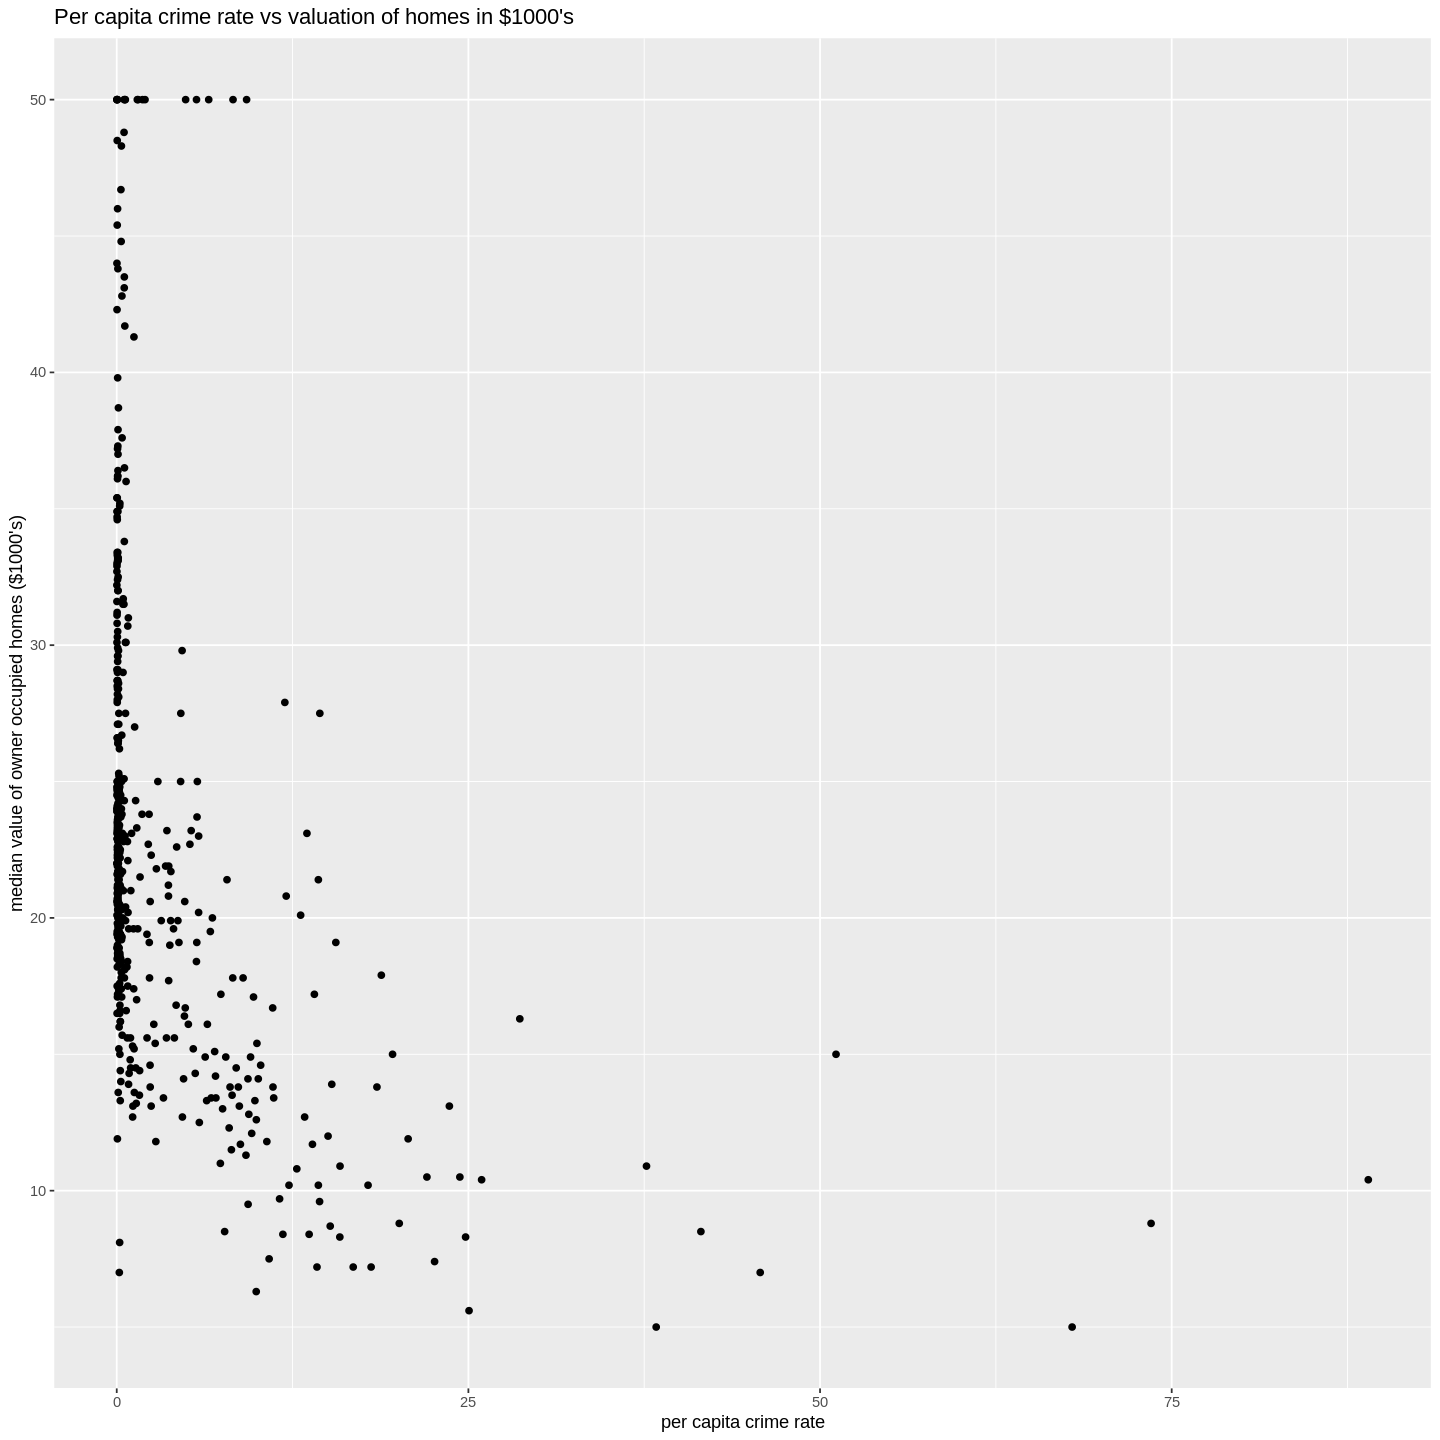

In [106]:
housing_crim_plot <- housing_nocol %>%
        ggplot(aes(x=crim, y=medv)) +
    geom_point() +
        labs(x= "per capita crime rate", y= "median value of owner occupied homes ($1000's)") +
        ggtitle("Per capita crime rate vs valuation of homes in $1000's")

housing_crim_plot

The above graph shows how the average valuation of homes decreases as per capita crime rate increases. We intend to test all of our variables against the medv column to determine which variable will affect the value of homes the most. After which we will use regression to determine the valuation of a new house given certain predictor values. 

Note for the above plot: there are likely going to be instances of higher crime rates in areas with more expensive homes due to the more expensive home having greater incentive for potential crime. However the general trend appears that between \\$30000 and \\$50000 there is the lowest per capita crime rate. (As a baseline analysis)

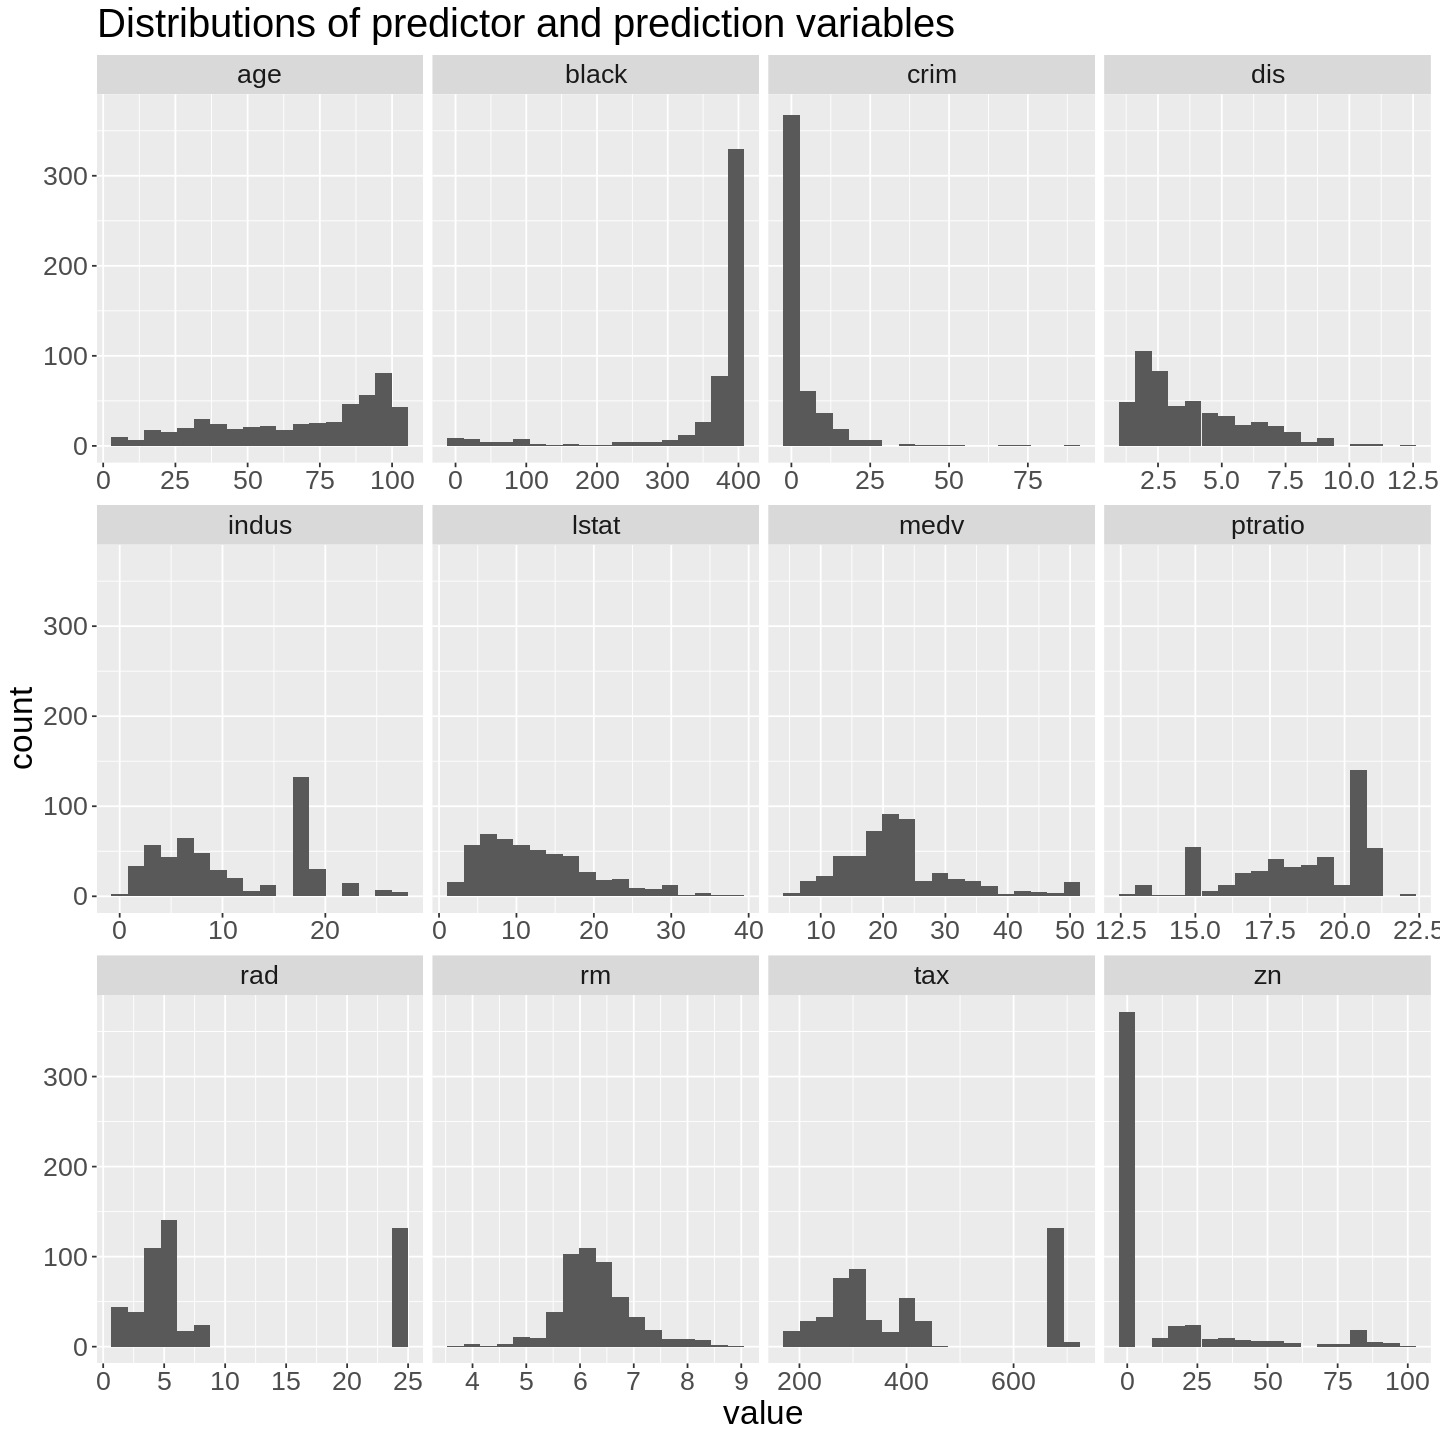

In [107]:
options(repr.plot.width = 12, repr.plot.height = 12)
long_data <- housing_nocol %>%
    gather()

predictor_histograms <- ggplot(long_data, aes(value)) + 
    geom_histogram(bins = 18) + 
    facet_wrap(~key, scales= 'free_x') + 
    theme(text = element_text(size = 20)) + 
    ggtitle("Distributions of predictor and prediction variables")

predictor_histograms
    


As a further part of our exploratory data analysis, the above histograms were generated to show the distribution of the prediction variable (medv) and all predictor variables.The histograms are useful in identifying the skew of the data; for instance, the variable 'crim' is right skewed and contains outliers that are generally greater than the mode. We would expect that these outliers may reduce the regression coefficent when performing linear regression with the prediction variable.

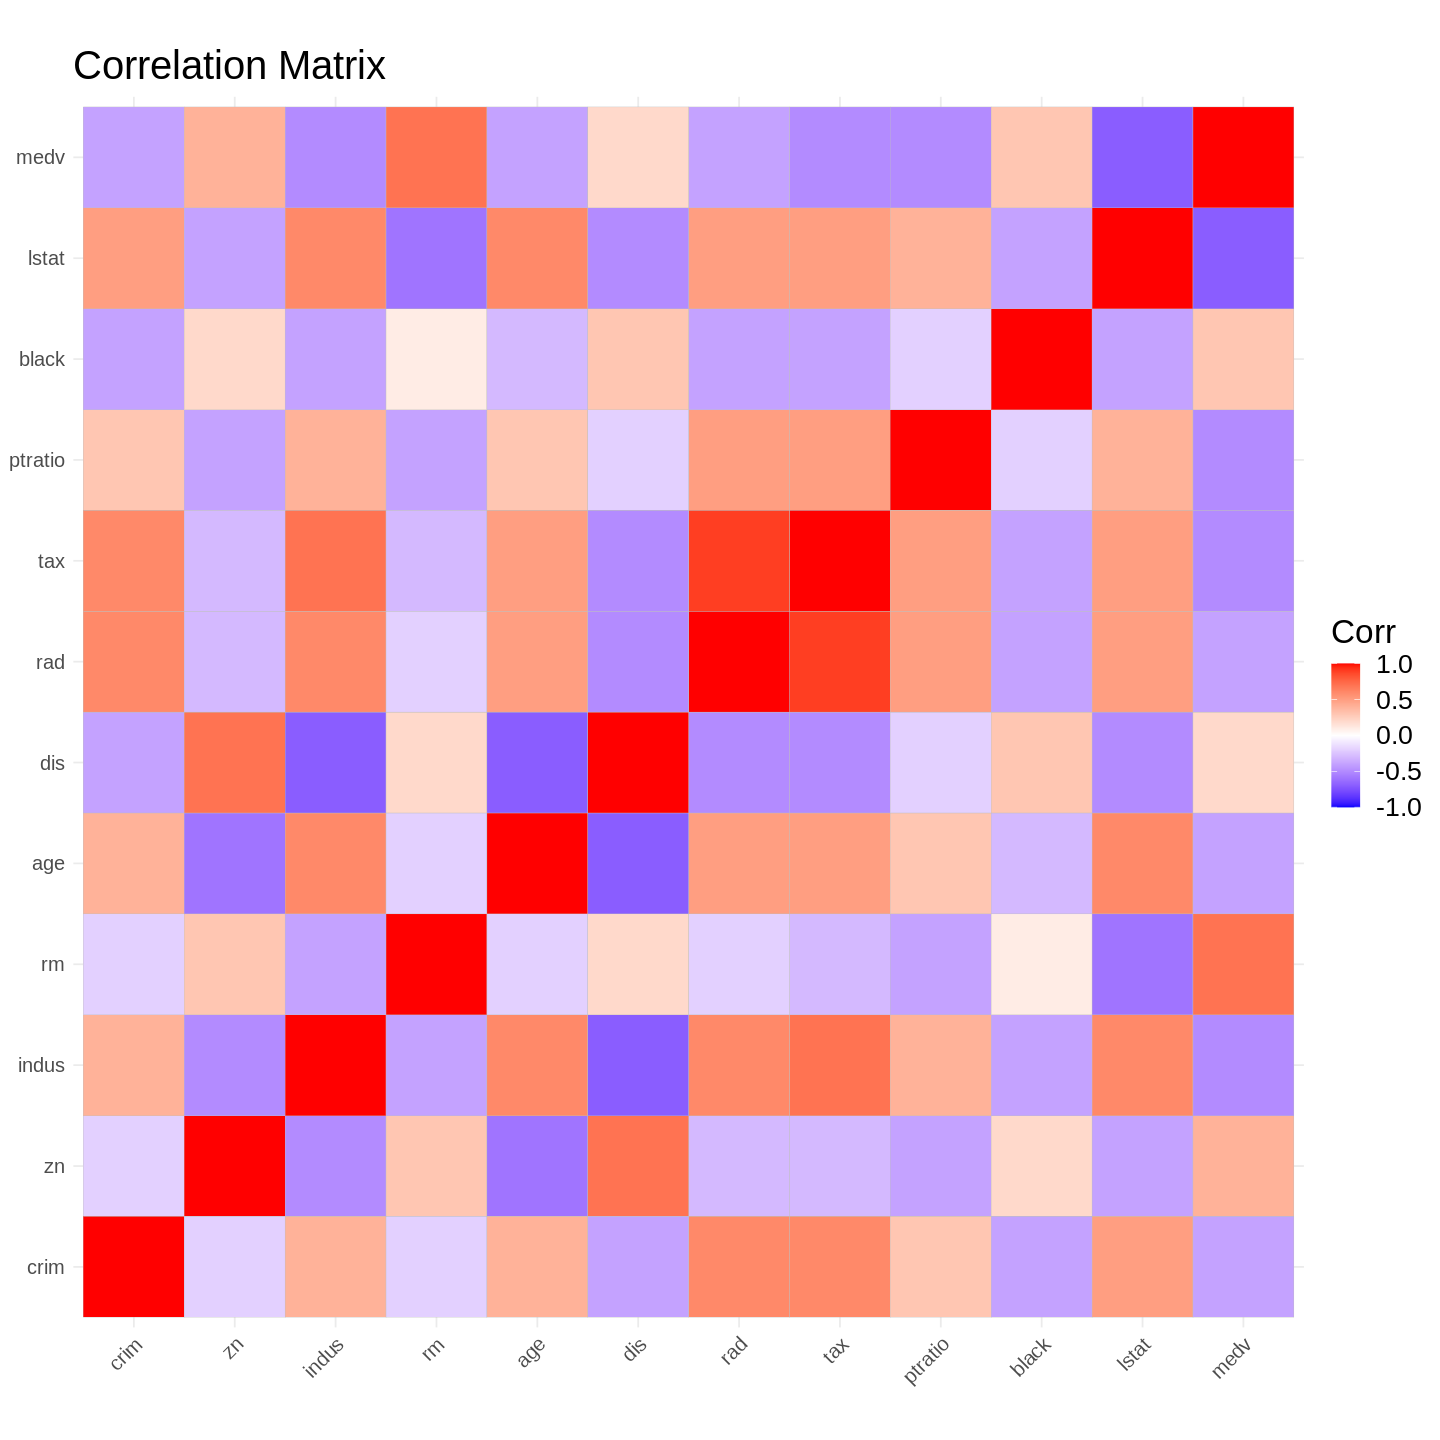

In [108]:
options(repr.plot.width = 12, repr.plot.height = 12)
correlation_matrix = round(cor(housing_nocol),1)
ggcorrplot(correlation_matrix) +
    theme(text = element_text(size = 20)) + 
    ggtitle("Correlation Matrix")

The above plot is a correlation matrix for all of the variables in the data set. By analysing which variables have the strongest (highest magnitude) correlation coefficents to 'medv', we can determine which variables are likely to be good predictors and which may be excluded during fitting of the linear regression model. For instance, we may hypothesise that the variables 'lsat' and 'rm' are strong predictors for medv while dis might feasibly be excluded from the fitting of the model. 

In [109]:
correlation_matrix

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.0,-0.2,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
zn,-0.2,1.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
indus,0.4,-0.5,1.0,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
rm,-0.2,0.3,-0.4,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
age,0.4,-0.6,0.6,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
dis,-0.4,0.7,-0.7,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
rad,0.6,-0.3,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
tax,0.6,-0.3,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5
ptratio,0.3,-0.4,0.4,-0.4,0.3,-0.2,0.5,0.5,1.0,-0.2,0.4,-0.5
black,-0.4,0.2,-0.4,0.1,-0.3,0.3,-0.4,-0.4,-0.2,1.0,-0.4,0.3


Based on the above correlation matrix, we exclude certain predictors which have a strong correlation between each other. The rationale for this is that if two predictor variables are highly correlated, then it will become harder to distinguish effects on the prediction variable by each variable individually because any increase in one predictor will be correlated with an increase in the second. 

We find that the number of room dwellings has a strong negative correlation with the % of the lower status of the population (coefficent = -0.6) so we include room-dwellings as it is likely to have a stronger causational relationship with the median value of the house. Hence we will exclude 'lsat' from our analysis. Similarly, the proportion of houses built prior to 1940 has a strong correlation with the weighted distance from five employment centres, so we will exclude the latter as the age of house has a stronger correlation coefficent (-0.4) than the distance to workplaces (0.2)

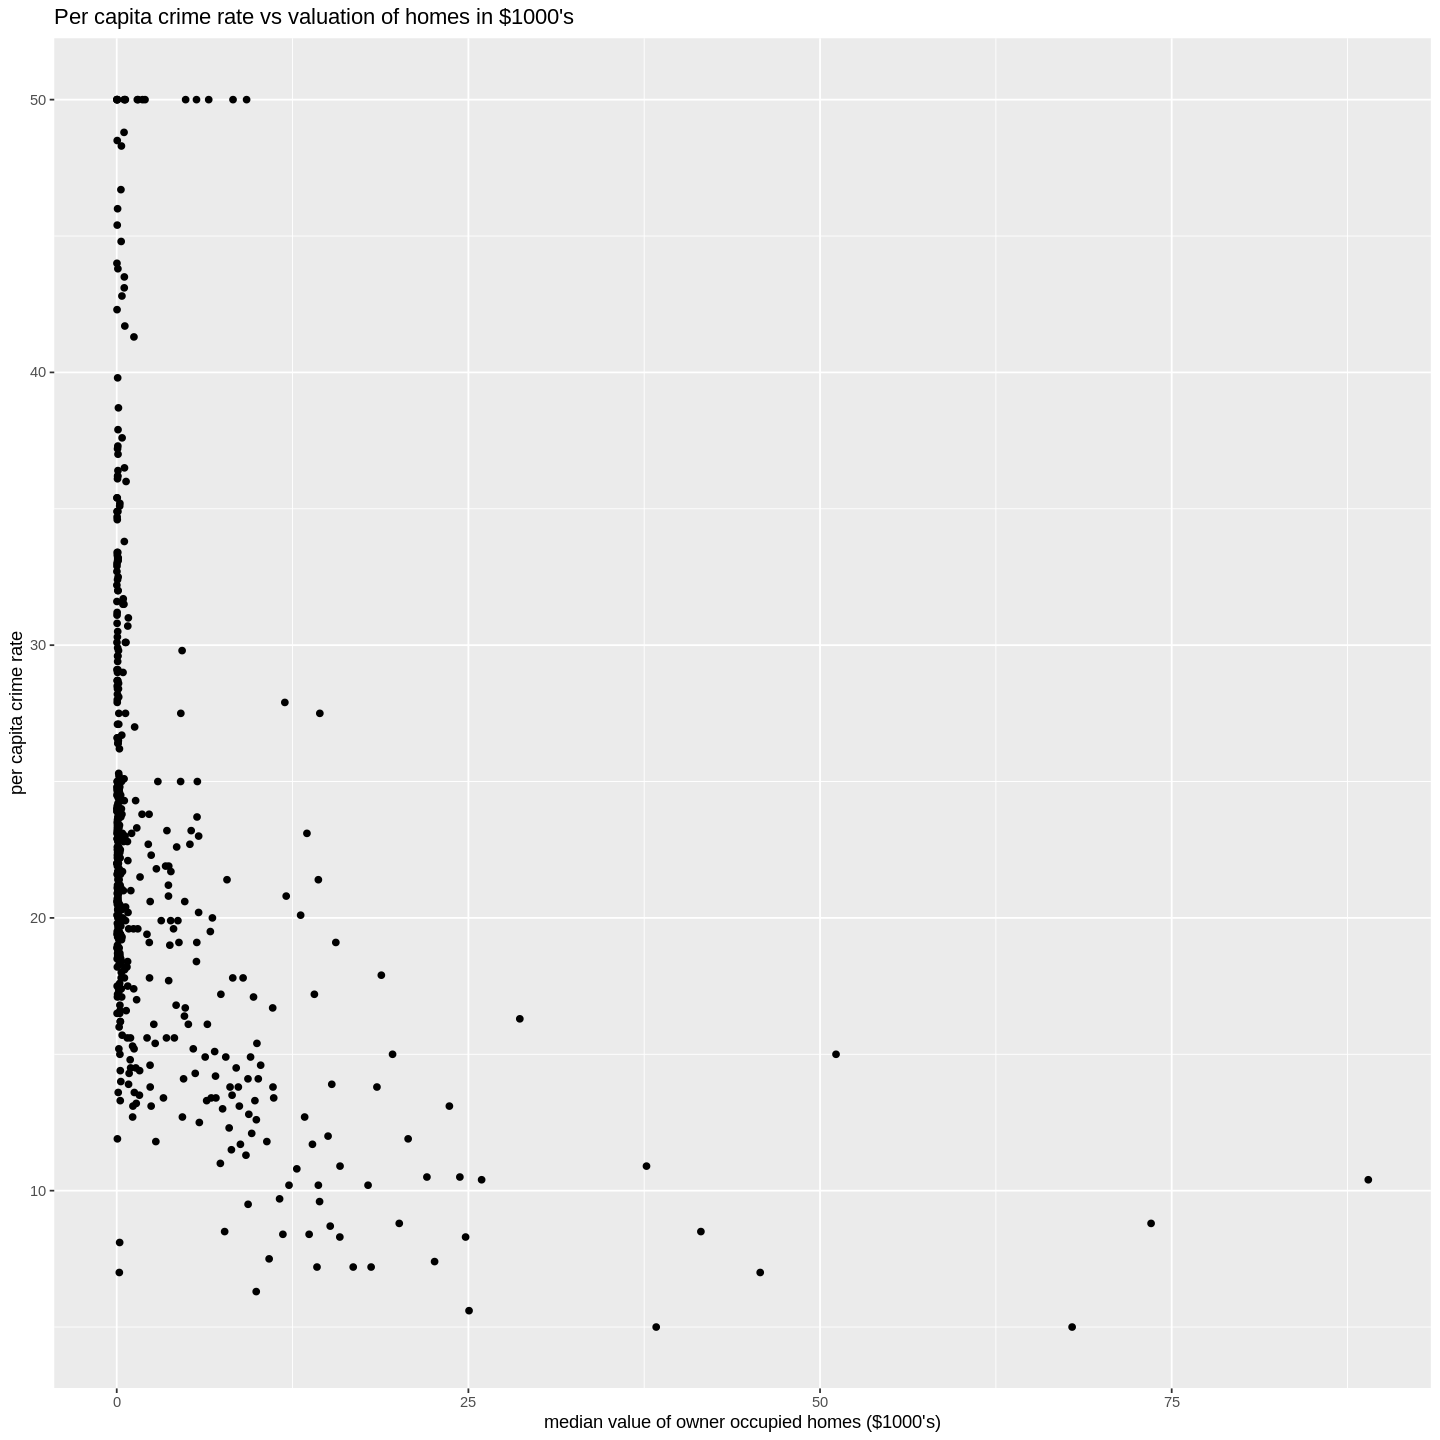

In [110]:
housing_crim_plot2 <- housing_nocol %>%
        ggplot(aes(x=crim, y=medv)) +
    geom_point() +
        labs(x= "median value of owner occupied homes ($1000's)", y= "per capita crime rate") +
        ggtitle("Per capita crime rate vs valuation of homes in $1000's")

housing_crim_plot2

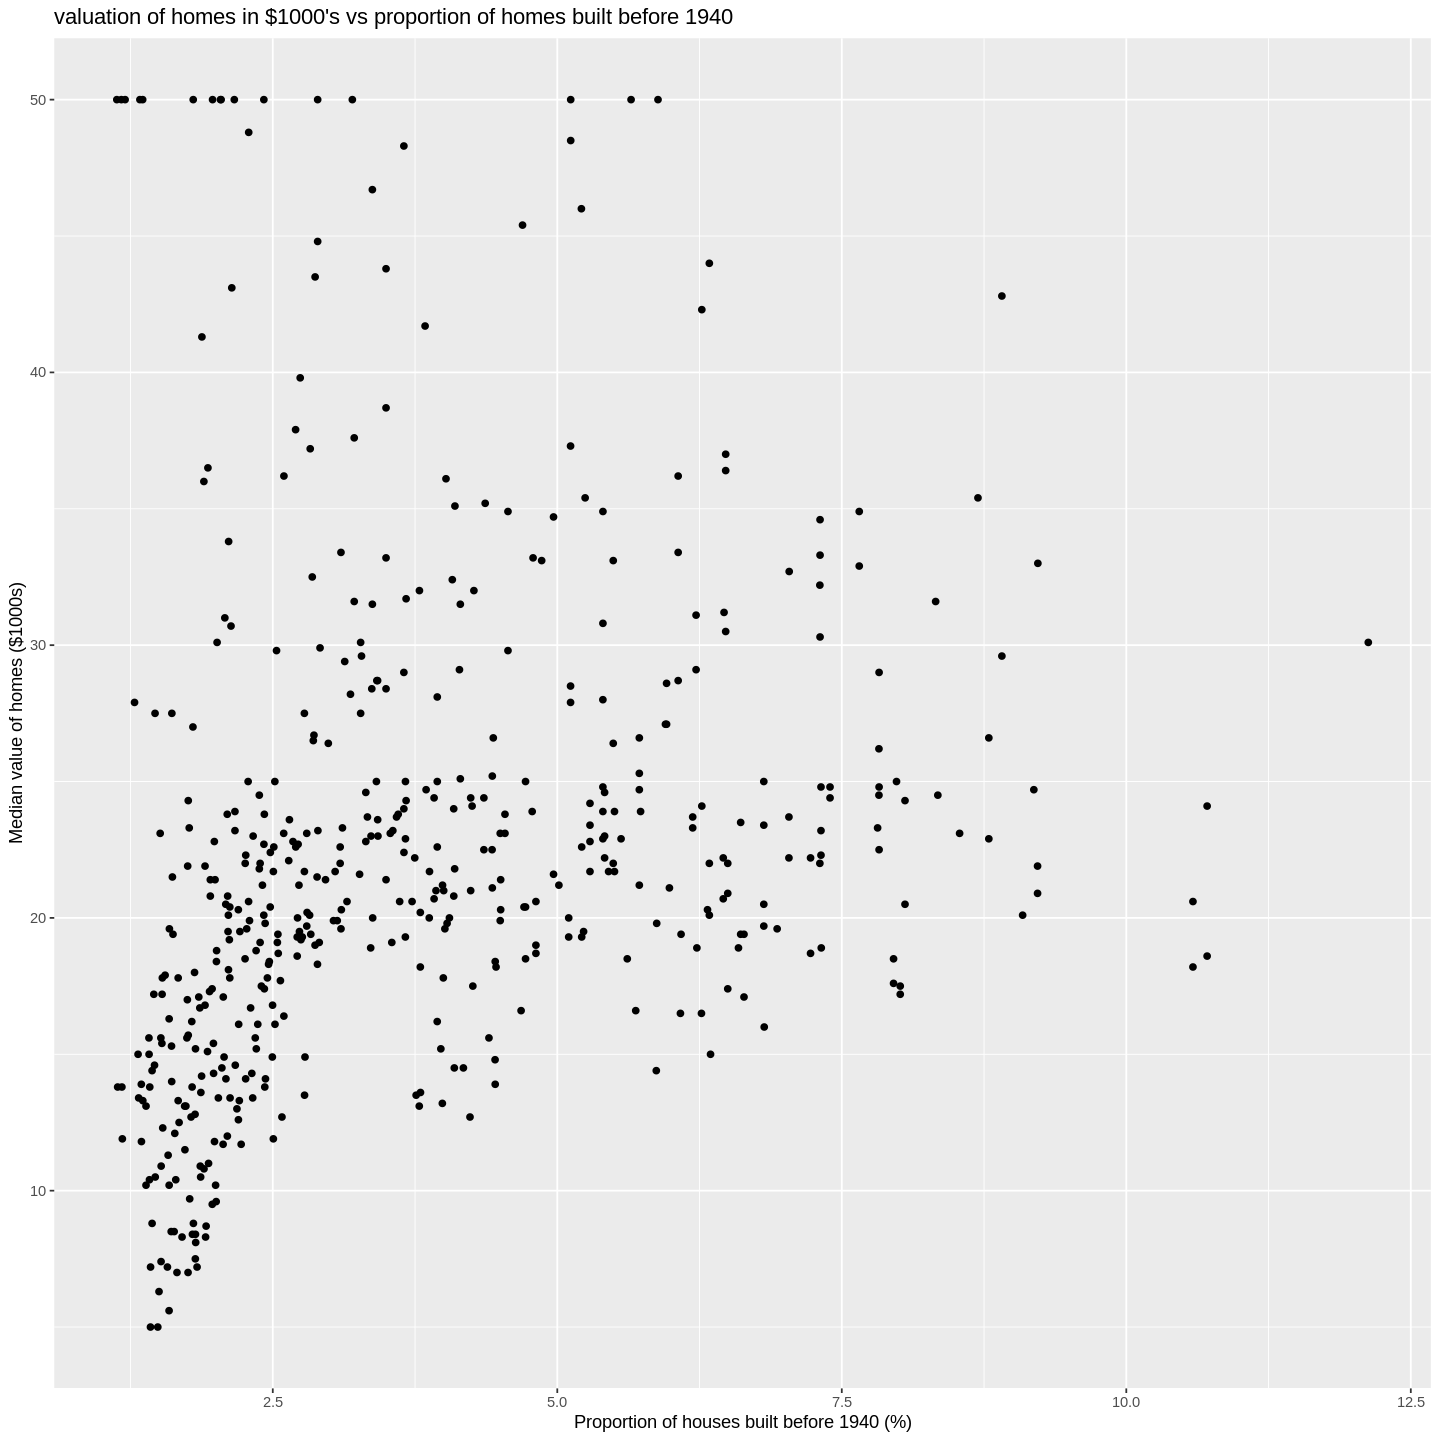

In [111]:
housing_age_plot <- housing_nocol %>%
        ggplot(aes(x=dis , y=medv)) +
    geom_point() +
        labs(x= "Proportion of houses built before 1940 (%)", y= "Median value of homes ($1000s)") +
        ggtitle("valuation of homes in $1000's vs proportion of homes built before 1940")

housing_age_plot

To include: lstat, crim, zn, indus, tax, age, ptratio

Exclude: black, rm (collinear with lstat and lower R with medv), rad(collinear with lsat + lower R with medv)

Tax appears to be quantised and may be a categorical value instead of a quantitative. This is because they are fixed tax rates per $10000
Indus: proportion of non-retail business acres per town. May be fixed by a municipal government.

square lsat and rm - both appear to be parabolic (move this to evaluation!)

Splitting the data into training + testing: 


In [112]:
housing_split <- initial_split(housing_nocol, prop = 0.80, stata = medv)
housing_training <- training(housing_split)
housing_testing <- testing(housing_split)

In [113]:
#Create model specification
housing_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")


In [114]:
housing_training <- housing_training %>% 
    mutate(lstat_sqrt = sqrt(lstat))
#Create recipe + workflow 
housing_recipe <- recipe(medv ~ lstat + crim + zn + indus + tax + age + ptratio , data = housing_training)

housing_fit <- workflow() %>%
       add_recipe(housing_recipe) %>%
       add_model(housing_spec) %>%
       fit(housing_training)


In [115]:
housing_test_results <- housing_fit %>%
         predict(housing_testing) %>%
         bind_cols(housing_testing) %>%
         metrics(truth = medv, estimate = .pred)


housing_test_results
housing_rmspe <- housing_test_results %>%
          filter(.metric == "rmse") %>%
          select(.estimate) %>%
          pull()
housing_rmspe
        

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.8191387
rsq,standard,0.5872858
mae,standard,3.8314319


[1] 5.819139